In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# import data set

In [2]:
df_products=pd.read_csv("D:/project zepto python/zepto_products.csv")
df_sales=pd.read_csv("D:/project zepto python/zepto_sales.csv")

# displaying basic info for product

In [3]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    38 non-null     int64  
 1   product_name  38 non-null     object 
 2   category      38 non-null     object 
 3   base_price    38 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ KB


In [4]:
df_products.describe()

,product_id,base_price
count,38.000000,38.000000
mean,119.500000,211.414474
std,11.113055,139.411328
min,101.000000,23.250000
25%,110.250000,105.307500
50%,119.500000,188.005000
75%,128.750000,290.127500
max,138.000000,531.370000


In [5]:
df_products.head()

,product_id,product_name,category,base_price
0,101,Apple,Fruits & Vegetables,103.13
1,102,Banana,Fruits & Vegetables,23.25
2,103,Onion,Fruits & Vegetables,55.75
3,104,Potato,Fruits & Vegetables,49.02
4,105,Tomato,Fruits & Vegetables,115.74


# display basic information for sales

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220220 entries, 0 to 220219
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            220220 non-null  int64  
 1   order_date          220220 non-null  object 
 2   product_id          220220 non-null  int64  
 3   quantity            220220 non-null  int64  
 4   city                219118 non-null  object 
 5   delivery_status     219118 non-null  object 
 6   customer_id         220220 non-null  int64  
 7   delivery_time_mins  215817 non-null  float64
 8   total_amount        220220 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 15.1+ MB


In [7]:
df_sales.describe()

,order_id,product_id,quantity,customer_id,delivery_time_mins,total_amount
count,220220.000000,220220.000000,220220.000000,220220.000000,215817.000000,220220.000000
mean,152325.652429,119.214218,1.548633,60016.100023,26.006246,302.336515
std,30172.200347,12.097782,1.003054,5781.447441,10.670646,324.031767
min,100001.000000,101.000000,1.000000,50000.000000,8.000000,23.250000
25%,126144.000000,109.000000,1.000000,55019.000000,17.000000,82.460000
50%,152444.500000,118.000000,1.000000,60019.000000,26.000000,226.870000
75%,178447.250000,134.000000,2.000000,65020.000000,35.000000,390.590000
max,204476.000000,138.000000,5.000000,69999.000000,44.000000,2656.850000


In [8]:
df_sales.shape

(220220, 9)

In [9]:
df_sales.head()

,order_id,order_date,product_id,quantity,city,delivery_status,customer_id,delivery_time_mins,total_amount
0,151992,2024-02-08 00:38:00,135,1,Bangalore,Delivered,66921,28.0,182.49
1,109440,2024-05-31 15:49:00,102,1,Mumbai,Delivered,66646,38.0,23.25
2,126862,2024-01-17 23:41:00,110,1,Mumbai,Delivered,69586,12.0,60.43
3,167258,2024-11-12 09:42:00,121,3,Hyderabad,Delivered,66719,12.0,996.12
4,159614,2024-01-02 17:50:00,112,4,Bangalore,Delivered,50094,38.0,907.48


In [10]:
df_sales.tail()

,order_id,order_date,product_id,quantity,city,delivery_status,customer_id,delivery_time_mins,total_amount
220215,204348,2024-04-08 00:51:00,112,2,Mumbai,Delivered,53512,18.0,453.74
220216,139692,2024-04-14 13:19:00,135,1,Bangalore,Delivered,60871,13.0,182.49
220217,155920,2024-11-22 13:49:00,110,1,Bangalore,Delivered,66690,19.0,60.43
220218,100568,2024-07-13 22:50:00,129,1,Bangalore,Delivered,61300,14.0,531.37
220219,195258,2024-07-30 11:27:00,112,1,Delhi,Delivered,63759,15.0,226.87


# cheking null values

In [11]:
df_sales.isnull().sum()

order_id                 0
order_date               0
product_id               0
quantity                 0
city                  1102
delivery_status       1102
customer_id              0
delivery_time_mins    4403
total_amount             0
dtype: int64

# Data Cleaning - Handling Missing Values and Duplicates

In [12]:
# removing null values from delivery_status and city    
df_sales=df_sales.dropna(subset=['delivery_status','city'])            

In [13]:
# replacing deliverytime nan values to mean
df_sales['delivery_time_mins']=df_sales['delivery_time_mins'].fillna(df_sales['delivery_time_mins'].mean())

In [14]:
# check for dupllicate values
df_sales.duplicated().sum()

np.int64(216)

In [15]:
#remove duplicates
df_sales.drop_duplicates(inplace=True)

## Convert 'order_date' to datetime objects


In [16]:
df_sales['order_date']=pd.to_datetime(df_sales['order_date'])

# Data Analysis - Aggregations and Grouping


In [17]:
# min amount
min_amount=df_sales['total_amount'].min()
print(min_amount)

23.25


In [18]:
# max amount
max_amount=df_sales['total_amount'].max()
print(max_amount)

2656.85


In [19]:
avg_amount=df_sales['total_amount'].mean()
print(avg_amount)

302.3239065039531


# Top 5 products by total sales amount


In [20]:
top_5_product=(df_sales.groupby('product_id')['total_amount'].sum().sort_values(ascending=False).head(5))
top_5_product

product_id
134    11658720.91
112     7908234.46
135     6171994.29
129     4796676.99
131     4716913.11
Name: total_amount, dtype: float64

## Merge with product details to get product names


In [21]:
top_products_name=top_5_product.reset_index().merge(df_products,on='product_id')
top_products_name

,product_id,total_amount,product_name,category,base_price
0,134,11658720.91,Handwash,Personal Care,390.59
1,112,7908234.46,Paneer 200g,Dairy & Eggs,226.87
2,135,6171994.29,Toothpaste,Personal Care,182.49
3,129,4796676.99,Detergent 1kg,Household Essentials,531.37
4,131,4716913.11,Toilet Paper,Household Essentials,513.21


## Total sales by city


In [22]:
total_sales_city=df_sales.groupby('city')['total_amount'].sum().sort_values(ascending=False)
total_sales_city

city
Mumbai       23063075.50
Bangalore    16385777.49
Delhi         9937151.01
Hyderabad     5305224.53
Pune          4559465.47
Kolkata       2671042.99
Chennai       2563667.49
Ahmedabad     1362556.30
Name: total_amount, dtype: float64

In [23]:
df_sales['city'].value_counts()

city
Mumbai       76062
Bangalore    54493
Delhi        32860
Hyderabad    17411
Pune         15144
Kolkata       8859
Chennai       8498
Ahmedabad     4479
Name: count, dtype: int64

# Average delivery time by city


In [24]:
average_delivery_time=df_sales.groupby('city')['delivery_time_mins'].mean().sort_values(ascending=False)
average_delivery_time

city
Ahmedabad    26.170095
Kolkata      26.089218
Chennai      26.059007
Pune         26.040857
Delhi        26.037475
Bangalore    26.015561
Mumbai       25.979052
Hyderabad    25.914055
Name: delivery_time_mins, dtype: float64

#  Sales trend over time (e.g., monthly sales)

In [25]:
# creating month column
df_sales['month']=df_sales['order_date'].dt.to_period('M')
# group by 
monthly_sales_trends=df_sales.groupby('month')['total_amount'].sum()
monthly_sales_trends

month
2024-01    5593297.49
2024-02    5286182.10
2024-03    5569350.76
2024-04    5375568.99
2024-05    5574801.37
2024-06    5380702.74
2024-07    5523114.55
2024-08    5468629.63
2024-09    5386353.65
2024-10    5547622.90
2024-11    5451878.37
2024-12    5690458.23
Freq: M, Name: total_amount, dtype: float64

# # Sales by product category

In [26]:
sales_by_category=df_sales.merge(df_products,on='product_id')
sales_by_product_cat=sales_by_category.groupby('category')['total_amount'].sum().sort_values(ascending=False)
sales_by_product_cat

category
Personal Care           23399215.51
Dairy & Eggs            12344371.12
Household Essentials    11975638.84
Munchies                 8083367.83
Beverages                6598799.13
Fruits & Vegetables      3446568.35
Name: total_amount, dtype: float64

#  Data Visualization with Matplotlib


# # Plot 1: Top 5 Products by Sales Amount


In [38]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(10,6)

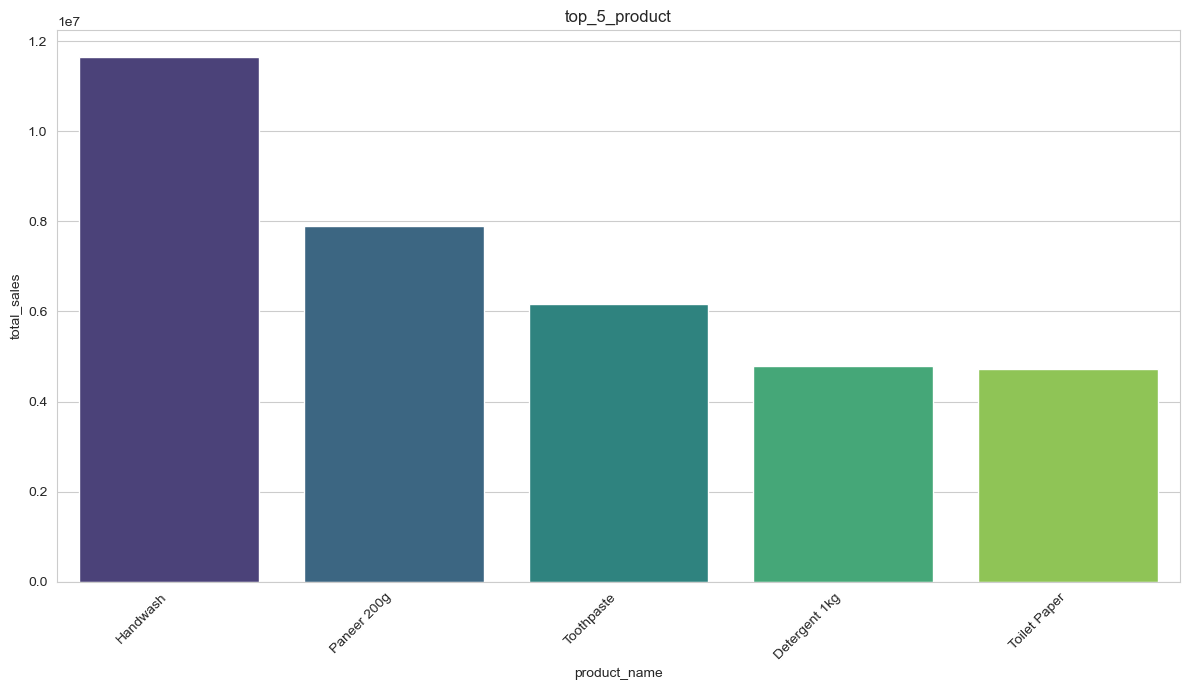

In [44]:
plt.figure(figsize=(12,7))
sns.barplot(x='product_name',y='total_amount',hue='product_name',  data=top_products_name,palette="viridis")
plt.title('top_5_product')
plt.xlabel('product_name')
plt.ylabel('total_sales')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#  Total Sales by City

C:\Users\Rohan Srivastav\AppData\Local\Temp\ipykernel_18260\3954852303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_city.index,y=total_sales_city.values,palette='magma')


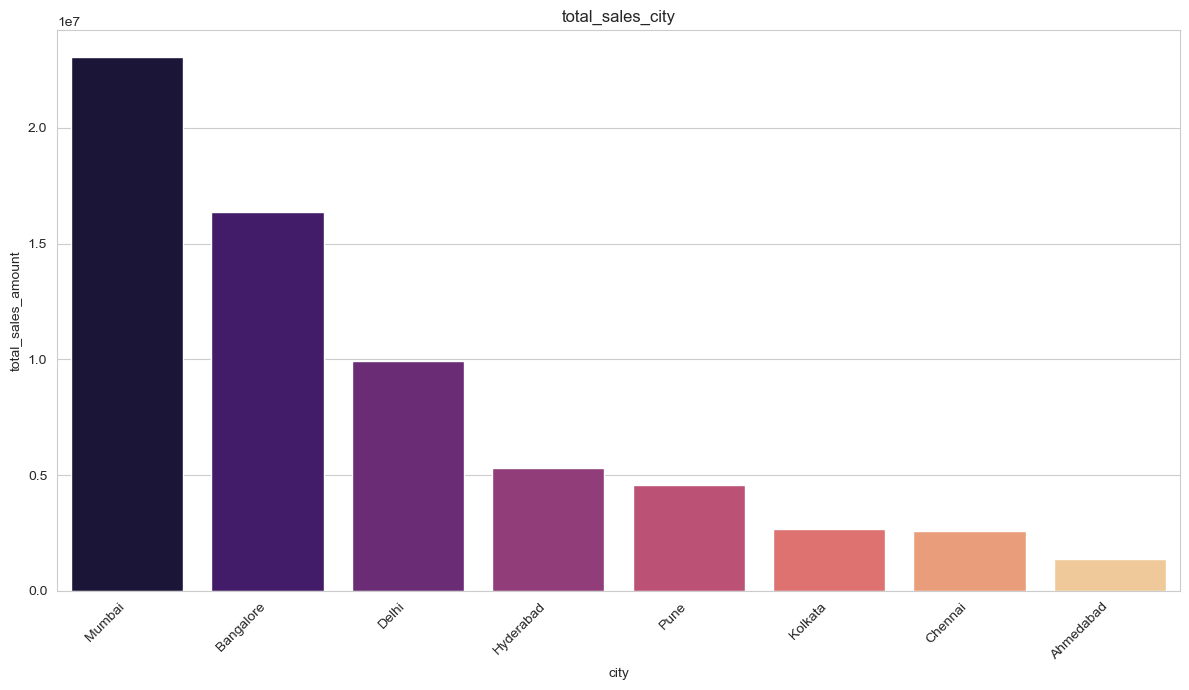

In [49]:
plt.figure(figsize=(12, 7))

sns.barplot(x=total_sales_city.index,y=total_sales_city.values,palette='magma')
plt.title('total_sales_city')
plt.xlabel('city')
plt.ylabel('total_sales_amount')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# # Plot 3: Monthly Sales Trend


Text(0, 0.5, 'sales')

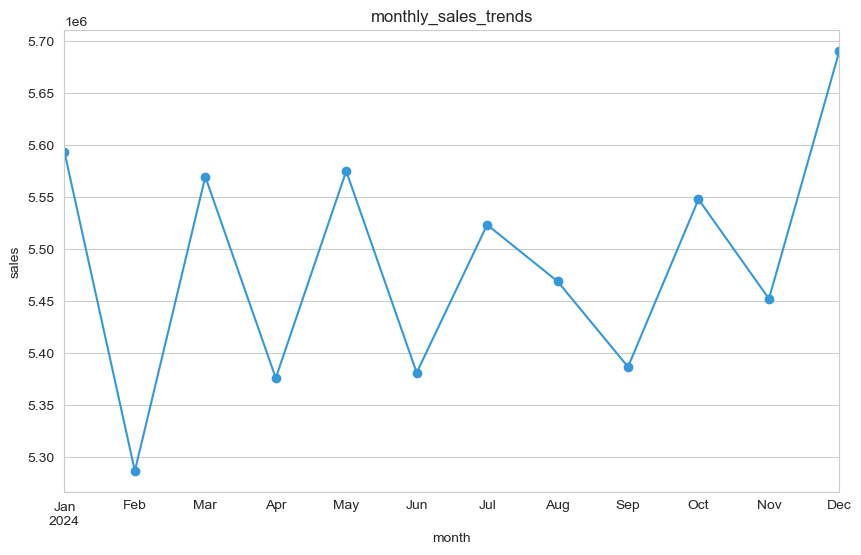

In [ ]:
plt.figure(figsize=(10,6))
monthly_sales_trends.plot(kind="line", marker="o", color="#3498DB")
plt.title('monthly_sales_trends')
plt.xlabel('month')
plt.ylabel('sales')


# Plot 4: Sales by Product Category (Pie Chart)


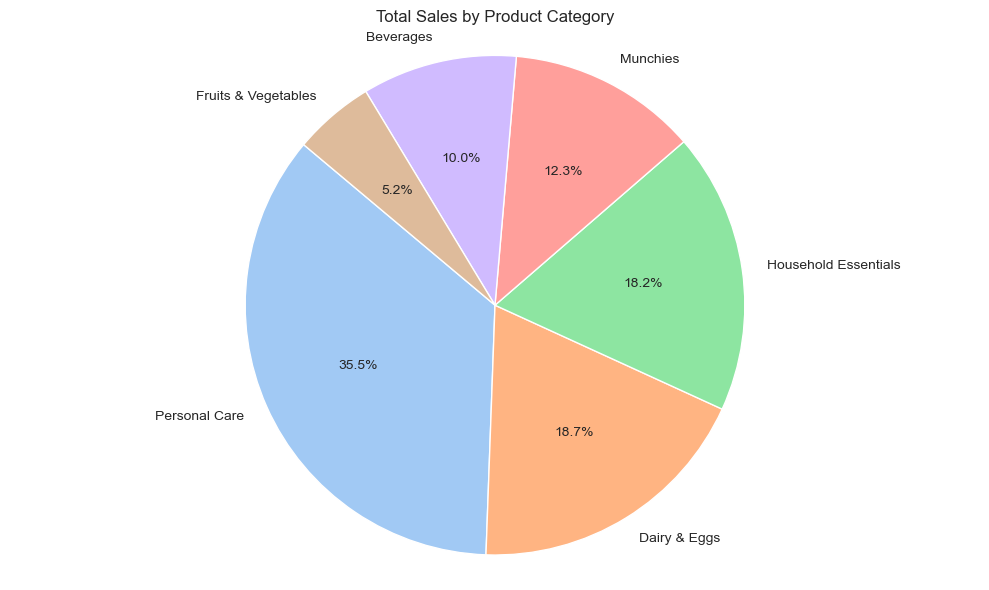

In [70]:
plt.Figure(figsize=(12,8))
plt.pie(sales_by_product_cat ,labels=sales_by_product_cat.index,
autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Total Sales by Product Category")
plt.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()


# # Plot 5: Distribution of Delivery Times


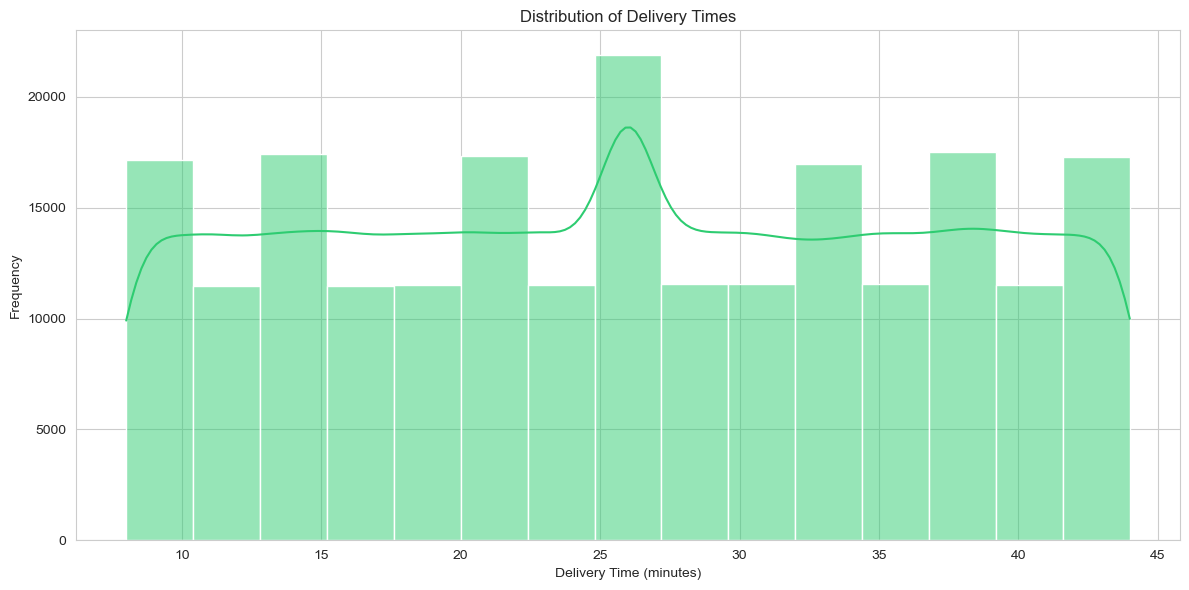

In [79]:
plt.figure(figsize=(12,6))
sns.histplot(df_sales['delivery_time_mins'], bins=15,kde=True,
color="#2ECC71")
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()